<img src="https://github.com/mtreinish/qiskit-workshop/blob/master/qiskit-heading.png?raw=1" alt="Drawing" style="width: 300px;"/>

# Qiskit Installation and Importing of the Necessary Packages

In [ ]:
!pip install qiskit[visualization]
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import qiskit
qiskit.__version__

'0.24.1'

In [ ]:
from qiskit import QuantumCircuit

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import state_fidelity

In [ ]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_paulivec
from qiskit.visualization import plot_state_hinton
from qiskit.visualization import plot_histogram

In [ ]:
from qiskit import ClassicalRegister, QuantumRegister, execute
from qiskit import BasicAer, Aer

In [ ]:
from qiskit_textbook.tools import array_to_latex

In [ ]:
from math import sqrt, pi

In [ ]:
svZero  = Statevector.from_label('0')  # creating a state vector labelled '0'
svOne   = Statevector.from_label('1')  # creating a state vector labelled '1'
svPlus  = Statevector.from_label('+')  # creating a state vector labelled '+'
svMinus = Statevector.from_label('-')  # creating a state vector labelled '-'
svRight = Statevector.from_label('r')  # creating a state vector labelled '+i'
svLeft  = Statevector.from_label('l')  # creating a state vector labelled '-i'

# Review: What we have learned so far

## Quantum circuits = qubits + gates

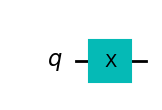

In [ ]:
mcX = QuantumCircuit(1) # creating a quantum circuit with only one qubit
mcX.x(0)                # adding an X gate on qubit '0'
mcX.draw('mpl')         # drawing the circuit



1.  How to create a quantum circuit with a single qubit
2.  How to add quantum gates to the circuit
3.  How to create the basis states $\vert 0\rangle$, $\vert 1\rangle$, $\vert +\rangle$, $\vert -\rangle$, $\vert +i\rangle$, $\vert -i\rangle$
4.  How to visualize those basis states on the Bloch sphere and on the Q-sphere
5.  How to run those states through the circuit
6.  How to visualize the resulting final state on the Bloch sphere and on the Q-sphere


This is a good start but neither of these 6 items is the full story:

1. The interesting circuits have **more than one qubit** - e.g., we need multiple qubits in order to have entanglement.
2. We can add a lot more stuff to a circuit (controlled gates, measuring devices).
3. What about all the other states on the Bloch sphere? How can we create those?
4. But that's cheating! In practice we cannot "measure" the state. At best we can perform pseudo-experiments to extract the probabilities.
5. There are different types of simulators:
QasmSimulator,
StatevectorSimulator (returns the final statevector of the ideal simulator), UnitarySimulator (returns the final equivalent unitary matrix of the circuit itself).
6. There are even more ways to "cheat" and visualize the final state directly!


## The effect of each individual quantum gate on the basis states

In [ ]:
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

# New trick 1: deriving the equivalent circuit using the UnitarySimulator

## Example 1: The crazy circuit from the last lecture

Recall our "crazy circuit" from last time.

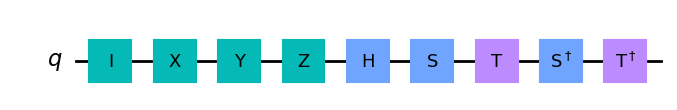

In [ ]:
mcCrazyCircuit = QuantumCircuit(1) # creating a quantum circuit with only one qubit
mcCrazyCircuit.id(0)               # adding an I gate on our circuit
mcCrazyCircuit.x(0)                # adding an X gate on our circuit
mcCrazyCircuit.y(0)                # adding a  Y gate on our circuit
mcCrazyCircuit.z(0)                # adding a  Z gate on our circuit
mcCrazyCircuit.h(0)                # adding an H gate on our circuit
mcCrazyCircuit.s(0)                # adding an S gate on our circuit
mcCrazyCircuit.t(0)                # adding a  T gate on our circuit
mcCrazyCircuit.sdg(0)              # adding an S-dagger gate on our circuit
mcCrazyCircuit.tdg(0)              # adding an T-dagger gate on our circuit
mcCrazyCircuit.draw('mpl')         # drawing the circuit

What is this circuit equivalent to? Let's find out by running it through the UnitarySimulator, which returns the final unitary matrix of the circuit itself. (Note that for this backend the circuit cannot contain irreversible operations like measurements or resets.)



In [ ]:
# Simulate the unitary
backend = qiskit.Aer.get_backend('unitary_simulator')
unitary = execute(mcCrazyCircuit,backend).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="$$ ")

<IPython.core.display.Math object>

Now simply place the latex output in a text box and look at it - we see that the result is simply $-iH$.

$$ \begin{bmatrix}
-\tfrac{1}{\sqrt{2}}i & -\tfrac{1}{\sqrt{2}}i  \\
-\tfrac{1}{\sqrt{2}}i & \tfrac{1}{\sqrt{2}}i  \\
\end{bmatrix}
=
\frac{-i}{\sqrt{2}}
\begin{bmatrix}
1 & 1  \\
1 & -1  \\
\end{bmatrix}
=
-iH
$$

This agrees with our result from last time when we executed the circuit explicitly and obtained

$$ {\tt CrazyCircuit} \vert 0 \rangle = -i \vert +\rangle  = -i H \vert 0\rangle$$

$$ {\tt CrazyCircuit} \vert 1 \rangle = -i \vert -\rangle = -i H \vert 1\rangle $$

Recall that the Hadamard gate $H$ was

$$
H =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

and its action on the basis states is

$$ H \vert 0 \rangle = \vert +\rangle $$

$$ H \vert 1 \rangle = \vert -\rangle $$

This is why the Hadamard gate is typically used when we need to create a superposition of the $\vert 0 \rangle$ and $\vert 1 \rangle$ states.

## Example 2: deriving operator identities

Often a series of gates applied in succession is equivalent to a simpler, shorter circuit.

\begin{array}{|c|c|}
\hline  Operations
& Result
\\ \hline
X\cdot X & I \\\hline
Y\cdot Y & I \\\hline
Z\cdot Z & I \\\hline
H\cdot H & I \\\hline
X+Z     & \sqrt{2} H \\\hline
T\cdot T & S \\\hline
S\cdot S \cdot S\cdot S& I \\\hline
T\cdot T\cdot T\cdot T\cdot T\cdot T\cdot T\cdot T & I \\\hline
H \cdot Z \cdot H & X \\ \hline
H \cdot X \cdot H & Z \\ \hline
H \cdot Y \cdot H & -Y \\ \hline
X \cdot Y \cdot X & -Y \\ \hline
\end{array}


Let me show you how to derive the last four identities (the homework) with this new trick.

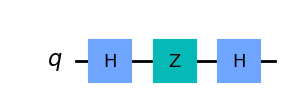

In [ ]:
testCircuit = QuantumCircuit(1) # creating a quantum circuit with only one qubit
testCircuit.h(0)                # adding an H gate on our circuit
testCircuit.z(0)                # adding an Z gate on our circuit
testCircuit.h(0)                # adding an H gate on our circuit
testCircuit.draw('mpl')         # drawing the circuit

In [ ]:
# Simulate the unitary
backend = qiskit.Aer.get_backend('unitary_simulator')
equivalentOutput = execute(testCircuit,backend).result().get_unitary()
# Display the results:
array_to_latex(equivalentOutput, pretext="$$ ")

<IPython.core.display.Math object>

So the result is

$$ \begin{bmatrix}
0 & 1  \\
1 & 0  \\
\end{bmatrix} = X
$$

## Break room exercises

These are your missions should you choose to accept them:

1. Team 1: Find the equivalent of HZHHYHHZH
2. Team 2: Find the equivalent of HXYXYZYXYXH
3. Team 3: Find the equivalent of HXYXYXYXYXH
4. Team 4: Find the equivalent of HXYXYXYXYXH


# New trick 2: initializing the quantum register

**In Qiskit quantum circuits, the qubits always start out in the state $\vert 0 \rangle$.** We can use the initialize() method to transform this into any state. We give initialize() the vector we want in the form of a list, and tell it which qubit(s) we want to initialise in this state:

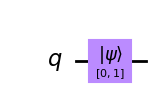

In [ ]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
#qc.h(0)                # adding an H gate on our circuit
qc.draw('mpl')  # Let's view our circuit (text drawing is required for the 'Initialize' gate due to a known bug in qiskit)

We can now use one of Qiskit’s simulators to view the resulting state of our qubit. In this case we are interested in the state vector, so it is convenient to use the statevector simulator:

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

To get the results from our circuit, we use execute to run our circuit, giving the circuit and the backend as arguments. We then use .result() to get the result of this:

In [ ]:
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [ ]:
# Display the results:
array_to_latex(out_state.data, pretext=" ")

<IPython.core.display.Math object>

Now we can go back, add a quantum gate and check its effect on the initial state. (Repeat the exercise after uncommenting the line adding the H gate.)

# Non-unitary operations

## Measurements

### Example 1: measuring the quantum register

The extraction of outputs in a quantum circuit is done using an operation called measurement. Each measurement tells a specific qubit to give an output to a specific output bit.

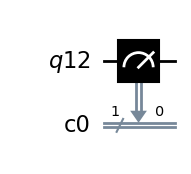

In [ ]:
q = QuantumRegister(1)         # create a 1 qubit quantum register
c = ClassicalRegister(1)       # create a 1 bit classical register
qc = QuantumCircuit(q, c)      # create a circuit
qc.measure(q, c)               # add a measuring device on the qubit
qc.draw('mpl')                 # draw the circuit

In this case we have a single qubit and a single classical bit. As a result of the measurement we will get one of the two states $\vert 0\rangle$ or $\vert 1\rangle$ with certain probabilities given by the (squares of) their amplitudes. In order to compute those probabilities, we must simulate many pseudo-experiments and accumulate sufficient statistics:

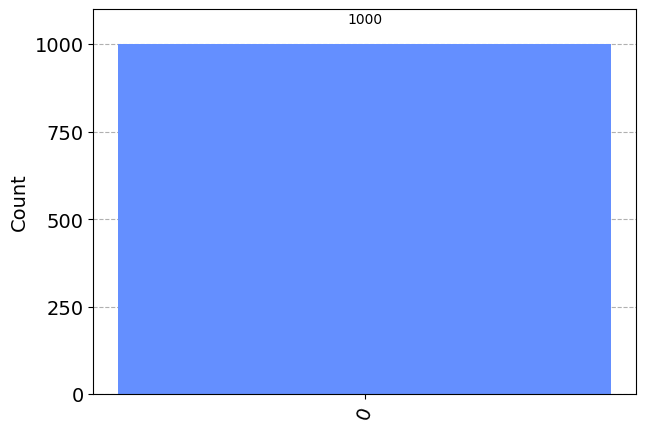

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

The simulator predicts that 100 percent of the time the classical register returns 0. (Recall that the default state of the quantum register is $\vert0\rangle$.

### Example 2: measuring the $\vert +\rangle$ state

Now let us first apply a Hadamard gate (to obtain the mixed state $\vert +\rangle$ and then do the measurement:

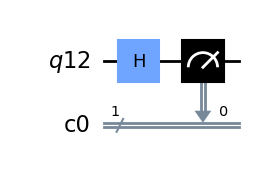

In [ ]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw('mpl')

Now let us run 1000 pseudoexperiments to get the respective probabilities:

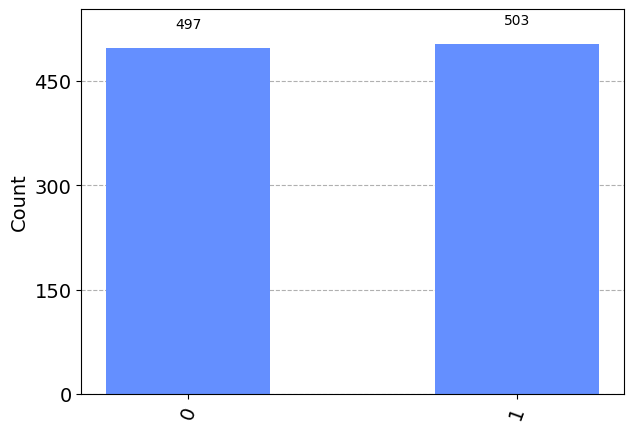

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

We see that there is roughly 50-50 chance to obtain each of the two states. (Repeat with more statistics)

## Reset

It is also possible to reset qubits to the $\vert 0\rangle$ state in the middle of computation. Note that reset is not a Gate operation, since it is irreversible.



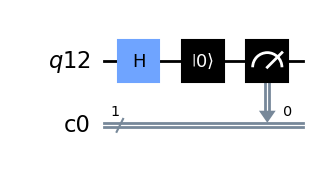

In [ ]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
qc.draw('mpl')

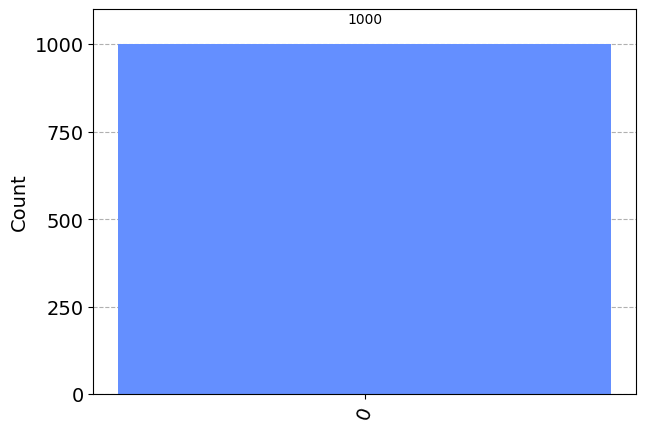

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

## Review exercises:

First challenge: Create a state vector that will give a  1/3  probability of measuring $\vert 0\rangle$. Feel free to use the widget below.

In [ ]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

Second challenge (Homework): Create a **different** state vector that will give the same measurement probabilities. Initialize the circuit with this state and do a measurement to prove that the probabilities come out as 1/3 and 2/3 respectively.

# Multiple qubit states

## Binary to decimal conversion

In [ ]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

## Two Qubits

Two qubits have $2^2=4$ possible states:

$$ \vert 00 \rangle = \vert 0\rangle $$
$$ \vert 01 \rangle = \vert 1\rangle $$
$$ \vert 10 \rangle = \vert 2\rangle $$
$$ \vert 11 \rangle = \vert 3\rangle $$

These basis states can be represented on the Q-sphere:

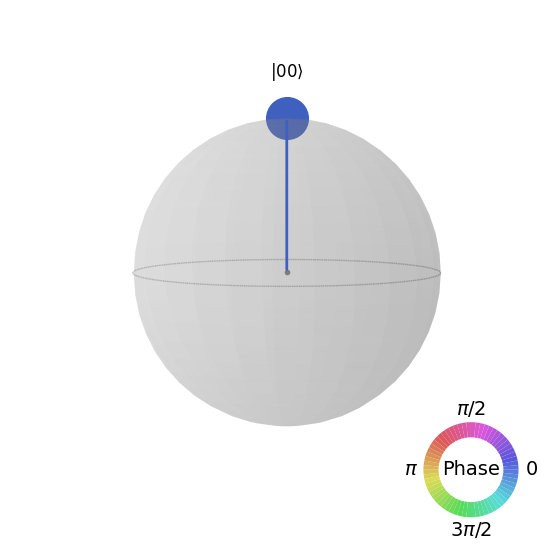

In [ ]:
sv = Statevector.from_label('00')
plot_state_qsphere(sv.data)

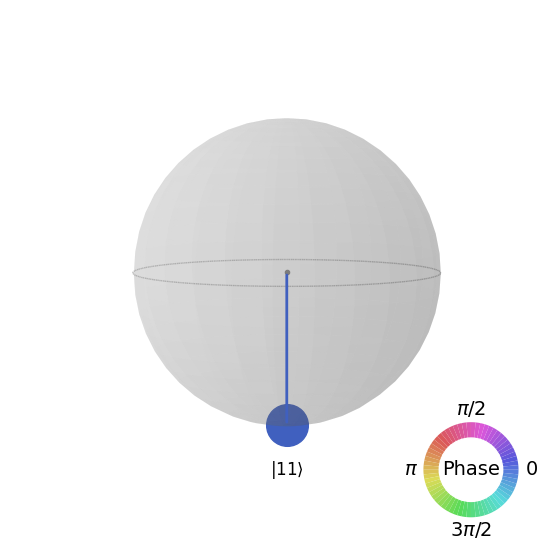

In [ ]:
sv = Statevector.from_label('11')
plot_state_qsphere(sv.data)

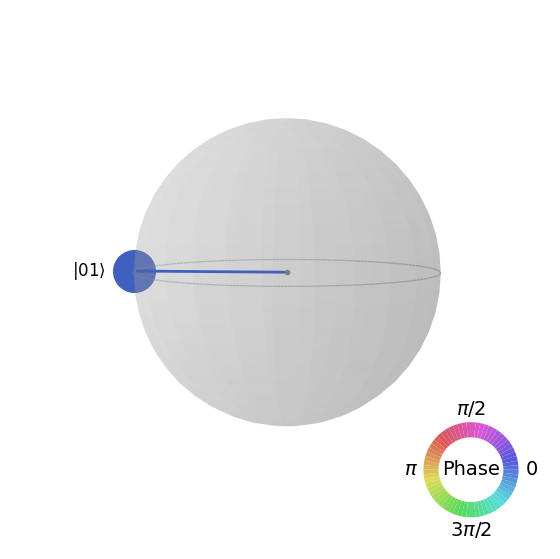

In [ ]:
sv = Statevector.from_label('01')
plot_state_qsphere(sv.data)

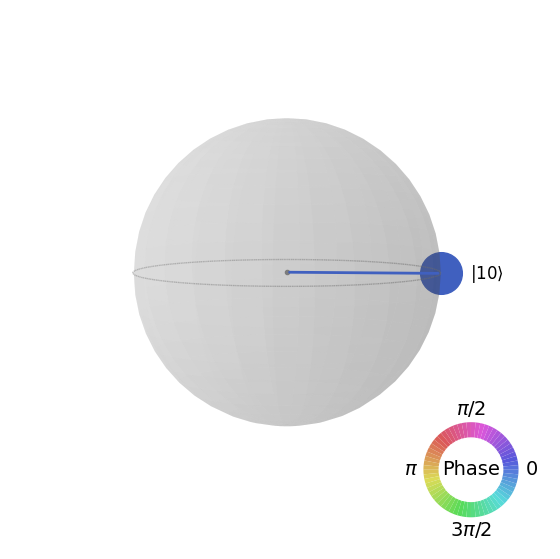

In [ ]:
sv = Statevector.from_label('10')
plot_state_qsphere(sv.data)

Therefore, describing the state of two qubits requires four complex amplitudes. (How many degrees of freedom?) We store these amplitudes in a 4D-vector like so:

$$\vert \psi\rangle =
a_{00}\vert 00 \rangle +
a_{01}\vert 01 \rangle +
a_{10}\vert 10 \rangle +
a_{11}\vert 11 \rangle  =
\begin{bmatrix}
a_{00} \\
a_{01} \\
a_{10} \\
a_{11}
\end{bmatrix}  $$



In general, for two qubits, we can describe their collective state using the tensor product:

$$ \vert a \rangle
=
\begin{bmatrix}
a_0 \\ a_1
\end{bmatrix},
\vert b \rangle
=
\begin{bmatrix}
b_0 \\ b_1
\end{bmatrix},
$$

$$
\vert ba \rangle
= \vert b \rangle \otimes \vert a \rangle
=
\begin{bmatrix}
b_0 \times
\begin{bmatrix}
a_0 \\ a_1
\end{bmatrix}
\\
b_1 \times
\begin{bmatrix}
a_0 \\ a_1
\end{bmatrix}
\end{bmatrix}
=
\begin{bmatrix}
b_0 a_0 \\
b_0 a_1 \\
b_1 a_0 \\
b_1 a_1
\end{bmatrix}
$$


###Break room exercise:

Write down the tensor product of the following two-qubit states:

1. Team 1: $\vert +\rangle \vert -i\rangle$
2. Team 2: $\vert -\rangle \vert +\rangle$
3. Team 3: $\vert -\rangle \vert +i\rangle$
4. Team 4: $\vert -i\rangle \vert +i\rangle$

Can you try to visualize the result on the Q-sphere?

## Three qubits

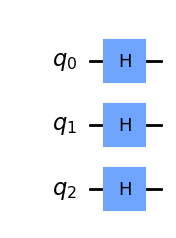

In [ ]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

In [ ]:
# Let's see the result
backend = qiskit.Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the
# array_to_latex function and use print(final_state) instead.
#from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

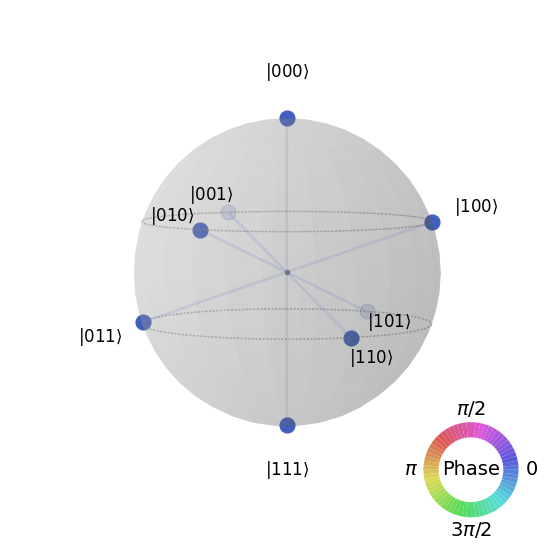

In [ ]:
plot_state_qsphere(final_state)

The `1 minute Qiskit` episode entitled `What is the qsphere?` succinctly describes the Qsphere visualization. You can find it here: https://youtu.be/4SoK2h4a7us

Answers to breakroom exercises: 1) X, 2) X, 3) Z, 4) -Y.

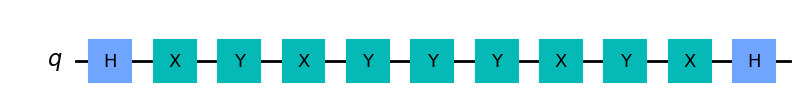

In [ ]:
testCircuit = QuantumCircuit(1) # creating a quantum circuit with only one qubit
testCircuit.h(0)                # adding an H gate on our circuit
testCircuit.x(0)                # adding an Z gate on our circuit
testCircuit.y(0)                # adding an H gate on our circuit
testCircuit.x(0)                # adding an H gate on our circuit
testCircuit.y(0)                # adding an Y gate on our circuit
testCircuit.y(0)                # adding an H gate on our circuit
testCircuit.y(0)                # adding an H gate on our circuit
testCircuit.x(0)                # adding an Z gate on our circuit
testCircuit.y(0)                # adding an H gate on our circuit
testCircuit.x(0)                # adding an H gate on our circuit
testCircuit.h(0)                # adding an Y gate on our circuit
testCircuit.draw('mpl')         # drawing the circuit

In [ ]:
# Simulate the unitary
backend = qiskit.Aer.get_backend('unitary_simulator')
equivalentOutput = execute(testCircuit,backend).result().get_unitary()
# Display the results:
array_to_latex(equivalentOutput)

<IPython.core.display.Math object>